# Canevas pour le TP sur-apprentissage

### <font color='red'>Attention: le piège notebook</font>

  - Il y a une console *cachée* derrière le notebook... Et l'exécution de chaque bloc change l'état courant de la mémoire. Lorsqu'on revient sur le bloc d'avant, ce n'est plus exactement le bloc d'avant puisque les variables globales ne sont plus les mêmes.
  

### <font color='blue'>Les trucs importants</font>

  - shift+entrer pour exécuter un bloc
  - tab pour la complétion 
  - Configurer matplotlib pour avoir les affichages dans la console au fur et à mesure


In [51]:
# imports nécessaires dans le cadre du TP
%matplotlib notebook   
# configuration matplotlib (avant l'import)
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

## Import des données 
$$X =  \left[\begin{array}{cccc}
  x_{11}& \ldots &x_{1d}\\  x_{i1}& \ddots &x_{id}
 \\     x_{N1}& \ldots &x_{Nd}
 \end{array}
 \right], \qquad Y =  \left[\begin{array}{cccc}
  y_{1}\\  \vdots \\   y_{N}
 \end{array}
 \right], \qquad x_{ij} \in [0,2], y_i \in \{0, 1, \ldots, 9\}$$
 
 Une image par ligne, associée à une étiquette entière. Chaque image est composée de $d=256$ pixels. 

In [52]:
# nom de fichier (chemin d'accès à personnaliser)
#################################################
fname = './usps_verysmall.pkl'
#################################################

data = pkl.load(open(fname,'rb'))
X = data['X']
Y = data['Y']
N,d = X.shape

print(N,d) # vérification basique
print(Y.shape)

300 256
(300,)


(256,)


<IPython.core.display.Javascript object>


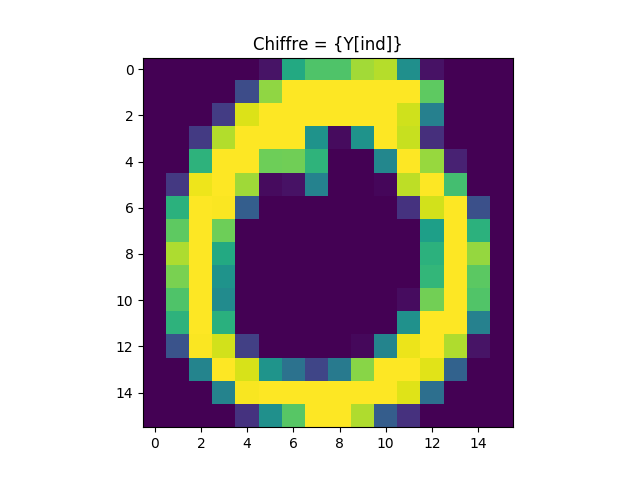

In [10]:
# Affichage d'un chiffre tiré aléatoirement

ind = int(np.random.rand()*N)
print(X[ind].shape)
plt.imshow(np.array(X[ind].reshape(16,16)*128, dtype = int)) # velur entière entre 0 et 255
plt.title('Chiffre = {Y[ind]}') # syntaxe très agréable pour les chaines formatée en python 3
plt.show()

# Répartition des données en apprentissage et test

Dans un premier temps, nous travaillons seulement sur les indices. La fonction
    
    ind_app, ind_test = repartition_app_test(N, pc_app)
    N : nombre d'échantillons dans la base
    pc_app : pourcentage des points à utiliser en apprentissage (entre 0 et 1)
    
doit retourner les jeux d'indices à utiliser pour l'apprentissage et le test. Ces indices auront été permutés aléatoirement en utilisant:

    np.random.permutation(N)
    
On peut par exemple obtenir
[4 8 2 1 0 7 5], [6 3 9] = repartition_app_test(10, 0.7)

Vous définirez ensuite xapp, yapp, xtest et ytest

In [20]:
perm =np.random.permutation(5)
a =np.array([1,2, 3])
a[1]

2

In [22]:
def repartition_app_test(N, pc_app):
    perm = np.random.permutation(N)
    
    ind_app = perm[0:int(pc_app*N)]
    ind_test = perm[int(pc_app*N):]
    return ind_app, ind_test

pc_app = 0.5 # on part initialement sur une répartition 50/50
ind_app, ind_test = repartition_app_test(N, pc_app)
xapp = X[ind_app]
yapp = Y[ind_app]
xtest = X[ind_test]
ytest = Y[ind_test]

print("test de somme", N, yapp.shape, ytest.shape)

test de somme 300 (150,) (150,)


# Classification des données par aproche bayesienne

Ce TP porte sur la sélection de modèle, c'est à dire le choix de la meilleure solution face à un problème donné. Nous allons comparer des approches vues en TME 3 et des approches discrimitnantes.

Parmi les approches discriminantes, nous chercherons à optimiser les hyper-paramètres afin d'optenir des performances maximales.

## Modélisation (naïve) de Bernoulli

Transformation des données pour avoir des pixels binaires:
$$Xb =  \left[\begin{array}{cccc}
  xb_{11}& \ldots &xb_{1d}\\  xb_{i1}& \ddots &xb_{id}
 \\     xb_{N1}& \ldots &xb_{Nd}
 \end{array}
 \right], \qquad Y =  \left[\begin{array}{cccc}
  y_{1}\\  \vdots \\   y_{N}
 \end{array}
 \right], \qquad x_{ij} \in \color{red}{\{0,1\}}, y_i \in \{0, 1, \ldots, 9\}$$

### Modification des données: chaque pixel

In [23]:
# binariser X
Xb = np.where(X >0, 1., 0.)
# Séparation des données apprentissage / test
xbapp = Xb[ind_app]
xbtest = Xb[ind_test]

### Fonctions d'apprentissage et d'inférence

    theta = learnBernoulli (X,Y)
    X : données d'apprentissage (un exemple par ligne)
    Y : Etiquettes entières correspondantes
    theta : autant de modèles que de Y différent
            un modèle par ligne
    
    p = logpobsBernoulli(X, theta)
    X : données à classifier (un exemple par ligne)
    theta : jeux de paramètres issus de la fonction précédente
    p : log-vraisemblance de chacune des classes pour chacun des exemples
    
$$p =  \left[\begin{array}{cccc}
  p(x_{1} | \theta_1) & p(x_{2} | \theta_1) &  \ldots &p(x_{N} | \theta_1)\\ 
  p(x_{1} | \theta_2) & p(x_{2} | \theta_2) &  \ldots &p(x_{N} | \theta_2)\\
  \vdots &\vdots &\vdots &\vdots \\ 
  p(x_{1} | \theta_C) & p(x_{2} | \theta_C) &  \ldots &p(x_{N} | \theta_C)\\
 \end{array}
 \right]$$

<IPython.core.display.Javascript object>


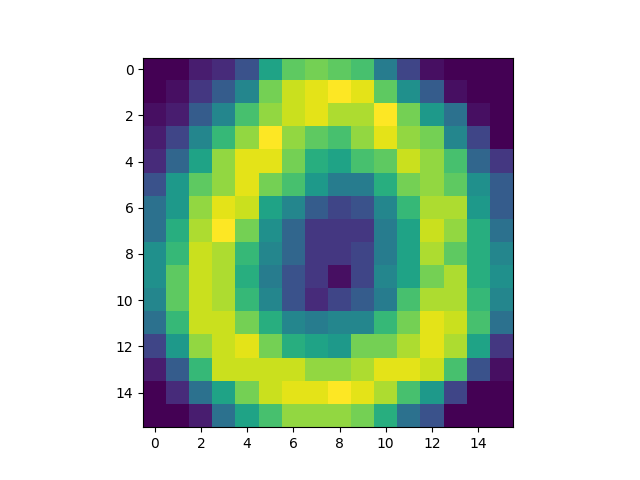

Bernoulli : Taux bonne classification en apprentissage :  0.96
Bernoulli : Taux bonne classification en test :  0.8


In [44]:
################################################################################
# Modelisation bernoulli
def learnBernoulli (X,Y): # construction
    theta = [(X[Y==y].mean(0)) for y in np.sort(np.unique(Y))]
    return np.array(theta)

def logpobsBernoulli(X, theta):
    seuil = 1e-4
    theta = np.maximum(np.minimum(1-seuil, theta),seuil)
    logp = [[ (x*np.log(mod)+(1-x)*np.log(1-mod)).sum() for x in X] for mod in theta ]
    return np.array(logp)

################################################################################
# Apprentissage d'un modèle & calcul des vraisemblance des observations
# refléchir à un moyen simple de retrouver la classe à partir du tableau de probabilités

theta = learnBernoulli ( xbapp, yapp )
logp  = logpobsBernoulli(xbapp, theta)
logpT = logpobsBernoulli(xbtest, theta)

# Si le code ci-dessus est difficile à comprendre, vous pouvez visualiser les modèles
plot = True # False
if plot:
    plt.figure()
    plt.imshow(np.array(theta[0].reshape(16,16)*255, dtype = int))
    plt.show()

################################################################################
# Inference

ypred  = logp.argmax(0)
ypredT = logpT.argmax(0) 

################################################################################
#Calcul de performances => Proposition d'une solution compacte

print("Bernoulli : Taux bonne classification en apprentissage : ",\
      np.where(ypred != yapp, 0.,1.).mean())
print("Bernoulli : Taux bonne classification en test : ",\
     np.where(ypredT != ytest, 0.,1.).mean())

## Modélisation géométrique

Calcul des profils de chiffres.
Transformation des données pour avoir, sur chaque ligne, la position du premier pixel allumé. Au pire, on considère que le pixel 17 (virtuel) est toujours allumé.

$$X =  \left[\begin{array}{cccc}
  xg_{1}\\  xg_{i}
 \\     xg_{N}
 \end{array}
 \right], \qquad Y =  \left[\begin{array}{cccc}
  y_{1}\\  \vdots \\   y_{N}
 \end{array}
 \right], \qquad x_{ij} \in \color{red}{\{1,2,\ldots,17\}}, y_i \in \{0, 1, \ldots, 9\}$$

In [69]:
################################################################################
# modelisation geometrique
def transfoProfil(X):
    x2 = []
    for x in X:
        ind = np.where(np.hstack((x.reshape(16, 16), np.ones((16,1))))>0)
        x2.append( [ind[1][np.where(ind[0] == i)][0] for i in range(16)])
    return np.array(x2)

################################################################################
# fonctions d'apprentissage / inférence identique (en usage) à celles de Bernoulli

def learnGeom ( X,Y):
    seuil = 1e-4
    theta = [(1./X[Y==y].mean(0)) for y in np.sort(np.unique(Y))]
    theta = np.array(theta)
    return np.maximum(np.minimum(1-seuil, theta),seuil)
# attention aux lignes tjs vides 

def logpobsGeom(X, theta):
    logp = [[( (x-1) * np.log(1 - mod) + np.log(mod)).sum() for x in X] for mod in theta]
    return np.array(logp)

Xg = transfoProfil(X)

# répartition apprentissage / test
pc_app = 0.5 # on part initialement sur une répartition 50/50
ind_app, ind_test = repartition_app_test(N, pc_app)
xapp = Xg[ind_app]
yapp = Y[ind_app]
xtest = Xg[ind_test]
ytest = Y[ind_test]

# apprentissage
theta = learnGeom ( xapp, yapp )
logp  = logpobsGeom(xapp, theta)
logpT = logpobsGeom(xtest, theta)
ypred  = logp.argmax(0)
ypredT = logpT.argmax(0) 
# évaluation 
print("Geo : Taux bonne classification en apprentissage : ",\
      np.where(ypred != yapp, 0.,1.).mean())
print("Geo : Taux bonne classification en test : ",\
     np.where(ypredT != ytest, 0.,1.).mean())

Geo : Taux bonne classification en apprentissage :  0.6333333333333333
Geo : Taux bonne classification en test :  0.66


In [68]:
Xg

array([[10,  9,  2, ...,  6,  6,  6],
       [ 4,  3,  2, ...,  3,  4,  5],
       [ 5,  5,  4, ...,  3,  3,  3],
       ...,
       [ 5,  5,  8, ...,  4,  8,  9],
       [ 2,  2,  2, ...,  3,  3,  4],
       [ 7,  6,  5, ...,  2,  2,  3]])

## Modélisation Gaussienne naïve

Correction du TME 3... En 10 lignes :)

In [74]:
###############################################################################
# Modélisation gaussienne

def woZeros(x): # fonction de suppression des 0 (remplacement par un seuil)
    #y = np.where(x==0., 1e-6, x) # plus logique mais moins performant !
    y = np.maximum(x, 1e-2) # seuillage de toutes les proba
    return y

def learnGauss ( X,Y): # moyenne et variances des 10 classes de données
    theta = [(X[Y==y].mean(0),woZeros(X[Y==y].var(0))) for y in np.unique(Y)]
    return np.array(theta)

def logpobsGauss(X, theta): # vraisemblance de X pour les 10 modèles
    logp = [[-0.5*np.log(mod[1,:] * (2 * np.pi )).sum() + \
             -0.5 * ( ( x - mod[0,:] )**2 / mod[1,:] ).sum () for x in X] for mod in theta ]
    return np.array(logp)

###############################################################################
# Apprentissage / inférence / test

# répartition apprentissage / test
Xw = woZeros(X)
pc_app = 0.5 # on part initialement sur une répartition 50/50
ind_app, ind_test = repartition_app_test(N, pc_app)
xapp = Xw[ind_app]
yapp = Y[ind_app]
xtest = Xw[ind_test]
ytest = Y[ind_test]

# apprentissage
theta = learnGauss ( xapp, yapp )
logp  = logpobsGauss(xapp, theta)
logpT = logpobsGauss(xtest, theta)
ypred  = logp.argmax(0)
ypredT = logpT.argmax(0) 
# évaluation 
print("Gauss : Taux bonne classification en apprentissage : ",\
      np.where(ypred != yapp, 0.,1.).mean())
print("Gauss : Taux bonne classification en test : ",\
     np.where(ypredT != ytest, 0.,1.).mean())


Gauss : Taux bonne classification en apprentissage :  0.94
Gauss : Taux bonne classification en test :  0.6933333333333334


# Passage aux approches discriminantes

Définition d'un classifieur Perceptron correspondant à la minimisation du coût suivant:
$$ f( \mathbf x_{i}) = \sum_{j} x_{ij} w_{j} , \qquad C =  \sum_{i=1}^{N} C_i =  \sum_{i=1}^{N}  (- y_{i} \mathbf x_{i} \mathbf w)_{+},\qquad (\alpha)_+ = \left\{ 
\begin{array}{cccc}
 \alpha & \mbox{ si } \alpha > 0 \\ 0 & \mbox{ sinon}
 \end{array}
 \right. $$
 
Nous utiliserons l'algorithme de descente de gradient stochastique:
  - Initialiser $\mathbf w_{0} = [0, \ldots, 0]$
  - Bouclage jusqu'à convergence (ou sur un nombre d'itérations)
     - Tirage aléatoire d'un échantillon $i$
     - Si $y_{i} \mathbf x_{i} \mathbf w \le 0$
        - Calcul de  $\nabla_{\mathbf w}  C_{i} = -y_{i} \mathbf x_{i}$
        - MAJ: $\mathbf w^{t+1} = \mathbf w^{t} - \epsilon \nabla_{\mathbf w} C_{i}$

Définir la fonction:
    
    w = perceptron(x, y, eps = 1e-5, niter = 20000)
    x : données d'apprentissage
    y : étiquettes d'apprentissage binaires définies en -1 / 1
    
On se rappelera que le calcul de $f(\mathbf x)$ s'effectue comme suit:

    yhat = x.dot(w)

In [114]:
# algorithme du perceptron
def perceptron(x, y, eps = 1e-5, niter = 20000):
    w = np.zeros(256)
    for j in range(niter):
        i=np.random.randint(35)
        if(y[i]*(x[i].dot(w))<=0):
            grad = -y[i]*x[i]
            w = w - eps*grad
    return w


In [132]:
# Application de l'algorithme du perceptron sur nos données pour la distinction des 1 et 2:
ind12,  = np.where((yapp > 0) & (yapp <3))
yapp12  = yapp[ind12]
yapp12  = np.where(yapp12 > 1 , -1., 1.) # transformation des étiquettes en {-1, 1}
xapp12  = xapp[ind12]

w = perceptron(xapp12, yapp12)

#########################################################
# Attention à avoir une sortie en -1 / 1 (ou alors changer le test dans le calcul dessous)
ypred = np.where(xapp12.dot(w) <= 0 , -1., 1.)

print("Percep : Taux bonne classification en apprentissage : ",np.where(ypred != yapp12, 0.,1.).mean())

Percep : Taux bonne classification en apprentissage :  1.0


Modifier la fonction du perceptron pour retourner l'ensemble des $\mathbf w$ mis à jour dans l'algorithme. Tracer sur une figure l'évolution de la fonction de coût (et éventuellement le taux de bonne classification). 

In [140]:
# algorithme du perceptron
def perceptronh(x, y, eps = 5e-6, niter = 20000):
    w = np.zeros(256)
    allw = []
    for j in range(niter):
        i=np.random.randint(35)
        if(y[i]*(x[i].dot(w))<=0):
            grad = -y[i]*x[i]
            w = w - eps*grad
            allw.append(w)
    return w,allw

w,allw = perceptronh(xapp12, yapp12)

c = np.zeros(len(allw)) # tous les couts
p = np.zeros(len(allw)) # tous les pourcentages de bonne classif
for i,w in enumerate(allw,1):
    # calcul des indicateurs ci-dessus
    print(i,*w)
    c[int(i)] = *w
    ypred = np.where(xapp12.dot(w) <= 0 , -1., 1.)
    p[i] = np.where(ypred != yapp12, 0.,1.).mean()
    
plt.figure()
plt.plot(c/np.max(c),'b') # affichage normalisé => plus facile à lire
plt.plot(p/np.max(p),'r')
plt.show()

SyntaxError: can't use starred expression here (<ipython-input-140-e4d633383f39>, line 20)

## Passage au multiclasse

Pour passer d'un classifieur binaire dans $\{-1,1\}$ à un classifieur dans $C$ classes, nous allons définir $C$ classifieurs appris indépendamment:
  - classifieur 1 = classe 1 vs toutes les autres (=-1)
  - classifieur 2 = classe 2 vs toutes les autres (=-1)
  - ...
  
Pour les classifieurs linéaires, l'idée est de concaténer tous les poids des $C$ classifieurs dans une matrice W:

$$W \in \mathbb R^{d,C} =  \left[\begin{array}{cccc}
  \mathbf w_1^T &  \mathbf w_2^T & \ldots & \mathbf w_C^T \\
 \end{array}
 \right], \qquad \mathbf{\hat y} = \mathbf x \cdot W \in \mathbb R^{C}$$

Le code fourni ci-dessous devrait fonctionner avec votre perceptron. 


In [ ]:
# passage au multiclasse (formulation fonctionnelle)

def classifMC(classif, x, y, **kargs): 
    # classif = passage d'une fonction
    # passage des arguments du classifieur dans **kargs
    N,d = x.shape
    classes = np.sort(np.unique(y)) # extraction de toutes les classes
    W = np.zeros((d,len(classes)))  # init W
    for i,target in enumerate(classes): # pour toutes les classes
        ytmp = np.where(y==target, 1, -1)
        W[:,i] = classif(x,ytmp, **kargs) # restitution des paramètres
    return W

In [ ]:
W = classifMC(perceptron, xapp, yapp, niter=30000)

# retrouver la formule d'inférence
ypred  = # à compléter
ypredT = #

print("Percep : Taux bonne classification en apprentissage : ",\
      np.where(ypred != yapp, 0.,1.).mean())
print("Percep : Taux bonne classification en test : ",\
      np.where(ypredT != ytest, 0.,1.).mean())

## Stabilité des résultats

Répeter K fois la séparation des données (apprentissage / test), apprentissage d'un modèle (Bernoulli, Perceptron ou les deux), évaluation des performances en test...

La stabilité des performances n'est pas très satisfaisante.

In [ ]:
# Etude de stabilité
pc_app = 0.5
K = 10
for k in range (K):
    ind_app, ind_test = repartition_app_test(N, pc_app)
    # répartition des données, app, éval, affichage...

# Evaluation en validation croisée, sélection de modèles

La validation croisée consiste à 
1. définir K blocs de tailles proches dans les données d'apprentissage
1. utiliser K-1 blocs pour l'apprentissage des modèles et 1 bloc pour le test

La division en K blocs est fastidieuse, surtout si on souhaite préserver les équilibres entre classes... Le code vous est fourni ci-dessous.

In [ ]:
# mise en place de la validation croisée
n_fold = 6; # paramètre critique : nb de blocs à définir

# OPT : mélange de toutes les données (X et Y)
# par classe faire 10 tas à peu près de mêmes tailles
yu = np.sort(np.unique(Y))
ind_cv_y = [np.array_split(np.where(Y == y)[0], n_fold) for y in yu]
# fusion de tous les indices par fold
ind_cv = [np.concatenate([ind_cv_y[c][fold] for c in range(len(yu))]) for fold in range(n_fold)]

def make_app_test(X, Y, i): # attention, beaucoup de variables globales dedans...
    itest  = ind_cv[i]
    iapp = np.concatenate([ind_cv[fold] for fold in range(n_fold) if fold != i])
    return X[iapp], Y[iapp], X[itest], Y[itest]

#### A vous d'utiliser la fonction ci-dessus pour évaluer vos modèles

## Définition d'un modèle de perceptron avec marge et régularisation

$$ f( \mathbf x_{i}) = \sum_{j} x_{ij} w_{j} , \qquad C =  \sum_{i=1}^{N}  ({\color{magenta} m -} y_{i} \mathbf x_{i} \mathbf w)_{+} + {\color{blue}{ \lambda \|\mathbf w\|^{2}}}$$

Comme nous l'avons vus en cours, nous allons introduire différents paramètres pour améliorer notre perceptron:
1. Un paramètre de marge pour que les points autour de $f( \mathbf x_{i}) = 0$ soient considérés comme mal classés et provoquent une mise à jour des poids du classifieurs
1. Un paramètre de régularisation pour se focaliser sur les dimensions les plus importantes et pénaliser les poids les moins importants
  - Montrer que la prise en compte du terme de régularisation correspond à un gradient de la forme:
  $$\nabla_{\mathbf w} = 2 \mathbf w$$
  - ... Et que la mise à jour en descente de gradient correspond à
  $$ \mathbf w \leftarrow \mathbf w * (1 - \lambda')$$

Donner le code de ce nouveau perceptron (svm linéaire), qui attend donc plus de paramètres.
    
    w = svmlin(x, y, regul = 1e-5, margin=.15, eps = 5e-6, niter = 20000)

In [ ]:
def svmlin(x, y, regul = 1e-5, margin=.15, eps = 2e-5, niter = 20000):
    # A compléter
    return w

## Sélection de modèle

La sélection de modèle consiste à déterminer quels sont les paramètres optimaux associés à un modèle. Cette sélection sera effectuée sur critère de validation croisée. Nous proposons de faire un *grid search* sur le paramètre de régularisation, sur les valeurs suivantes:

    reg = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0]

On va donc d'une régulartisation forte à une régularisation nulle. 
1. Trouver la valeur optimale des paramètres
1. Etudier les écarts entre performances en apprentissage et performances en test
1. La performance obtenue sur le meilleur modèle est-elle un estimateur débiaisé de la performance en test?

In [ ]:
# Sélection de modèle

# Comparaison significative entre modèles

Une fois que vous avez appliqué la procédure de validation croisée sur deux classifieurs, vous obtenez deux tableaux de performances:
$$\left[\begin{array}{cccc}
P_{mod1} = & p_{11} & \ldots & p_{1K} \\
P_{mod2} = & p_{21} & \ldots & p_{2K} \\
 \end{array}
 \right]$$
 
 Nous proposons ensuite d'utiliser la méthodologie d'un de nos exercice de TD:
 
 Soit $X_1, X_2, \ldots, X_{n}$ une suite de variables aléatoires réelles définies sur le même espace de probabilité, indépendantes et identiquement distribuées suivant la même loi $X$, de moyenne $\mu$. Lorsque la variance de $D$ est inconnue, il faut passer du TCL au test de Student, qui dit que la variable  

$$T={\frac  {\bar X - \mu}{{\sigma_{x}/\sqrt  {n}}}}, \qquad \sigma_{d} = \sqrt{\frac{\sum_{i} (x_{i} - \bar x)^{2}}{n-1}}$$
suit une loi de Student à $n-1$ degrés de liberté. $\sigma_{d}$ correspond à l'estimation non biaisée de l'écart type de $X$.

Remarque: vous pouvez chercher les valeurs limites de la loi de Student dans votre fascicule de TD ou utiliser:

    alpha : niveau de confiance
    ddl : nb dégrés de liberté
    from scipy import stats
    stats.t.ppf(alpha, df=ddl)